### Exploratory Data Analysis (EDA) on Togo-Dapaong Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os,sys
from pandas.plotting import scatter_matrix 

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


from scripts.utils import (
    detect_outliers_iqr,
    plot_time_series, 
    plot_correlation_analysis, 
    plot_wind_analysis, 
    plot_temperature_analysis, 
    plot_histograms, 
    calculate_z_scores, 
    plot_bubble_chart, 
    clean_dataset
)


Reading the data from CSV

In [2]:
togo_df = pd.read_csv('../Data/togo-dapaong_qc.csv')
togo_df.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
5,2021-10-25 00:06,-1.2,0.0,0.0,0.0,0.0,24.9,93.9,1.2,1.4,0.3,226.2,4.8,977,0,0.0,24.8,24.5,NaN
6,2021-10-25 00:07,-1.1,0.0,0.0,0.0,0.0,24.9,93.8,1.2,1.4,0.3,226.4,0.9,977,0,0.0,24.8,24.5,NaN
7,2021-10-25 00:08,-1.1,0.0,0.0,0.0,0.0,24.9,93.7,1.1,1.4,0.3,224.5,2.8,977,0,0.0,24.8,24.5,NaN
8,2021-10-25 00:09,-1.1,0.0,0.0,0.0,0.0,24.9,93.6,1.0,1.4,0.3,225.6,4.1,977,0,0.0,24.8,24.5,NaN
9,2021-10-25 00:10,-1.1,0.0,0.0,0.0,0.0,24.9,93.4,0.9,1.4,0.4,231.5,0.9,977,0,0.0,24.8,24.5,NaN


In [4]:
togo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [5]:
# Shape of the dataframe

togo_df.shape

(525600, 19)

In [6]:
# Check null values

null_values = togo_df.isnull().sum()
null_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
# Data summary

togo_df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


### Summary Statistics

Mean

In [8]:
numeric_df = togo_df.select_dtypes(include=['number'])
numeric_df.mean()

GHI              230.555040
DNI              151.258469
DHI              116.444352
ModA             226.144375
ModB             219.568588
Tamb              27.751788
RH                55.013160
WS                 2.368093
WSgust             3.229490
WSstdev            0.557740
WD               161.741845
WDstdev           10.559568
BP               975.915242
Cleaning           0.000535
Precipitation      0.001382
TModA             32.444403
TModB             33.543330
Comments                NaN
dtype: float64

Median

In [9]:
numeric_df = togo_df.select_dtypes(include=['number'])
numeric_df.median()

GHI                2.1
DNI                0.0
DHI                2.5
ModA               4.4
ModB               4.3
Tamb              27.2
RH                59.3
WS                 2.2
WSgust             2.9
WSstdev            0.5
WD               199.1
WDstdev           10.8
BP               976.0
Cleaning           0.0
Precipitation      0.0
TModA             28.4
TModB             28.4
Comments           NaN
dtype: float64

Standard Deviation

In [10]:
numeric_df = togo_df.select_dtypes(include=['number'])
numeric_df.std()

GHI              322.532347
DNI              250.956962
DHI              156.520714
ModA             317.346938
ModB             307.932510
Tamb               4.758023
RH                28.778732
WS                 1.462668
WSgust             1.882565
WSstdev            0.268923
WD                91.877217
WDstdev            5.915490
BP                 2.153977
Cleaning           0.023116
Precipitation      0.026350
TModA             10.998334
TModB             12.769277
Comments                NaN
dtype: float64

Range

In [11]:
numeric_df = togo_df.select_dtypes(include=['number'])
range_value = numeric_df.max() - numeric_df.min()
range_value

GHI              1436.7
DNI              1004.5
DHI               805.7
ModA             1380.0
ModB             1367.0
Tamb               26.5
RH                 96.5
WS                 16.1
WSgust             23.1
WSstdev             4.7
WD                360.0
WDstdev            86.9
BP                 15.0
Cleaning            1.0
Precipitation       2.3
TModA              57.3
TModB              81.5
Comments            NaN
dtype: float64

Variance

In [12]:
numeric_df = togo_df.select_dtypes(include=['number'])
variance_values = numeric_df.var()
variance_values

GHI              104027.114611
DNI               62979.396604
DHI               24498.733805
ModA             100709.079218
ModB              94822.430972
Tamb                 22.638780
RH                  828.215434
WS                    2.139397
WSgust                3.544049
WSstdev               0.072320
WD                 8441.422923
WDstdev              34.993016
BP                    4.639619
Cleaning              0.000534
Precipitation         0.000694
TModA               120.963341
TModB               163.054438
Comments                   NaN
dtype: float64

#### Data Quality Check

Missing Values

In [14]:
missing_values = togo_df.isna().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Check for negative values in columns that should only have positive values

In [15]:
incorrect_entries = {
    'GHI': (togo_df['GHI'] < 0).sum(),
    'DNI': (togo_df['DNI'] < 0).sum(),
    'DHI': (togo_df['DHI'] < 0).sum(),
}

print("\nIncorrect Values:")
for key, value in incorrect_entries.items():
    print(f' {key} : {value}')


Incorrect Values:
 GHI : 257385
 DNI : 0
 DHI : 0


Detect Outlier using Function

In [16]:
from scripts.utils import detect_outliers_iqr

outliers = {
    'ModA': detect_outliers_iqr(togo_df['ModA']),
    'ModB': detect_outliers_iqr(togo_df['ModB']),
    'WS': detect_outliers_iqr(togo_df['WS']),
    'WSgust': detect_outliers_iqr(togo_df['WSgust'])
}

print("\nOutliers Detected:")
for key, value in outliers.items():
    print(f' {key} : {value}')


Outliers Detected:
 ModA : 1237
 ModB : 1537
 WS : 8708
 WSgust : 7377


### Time Series Analysis

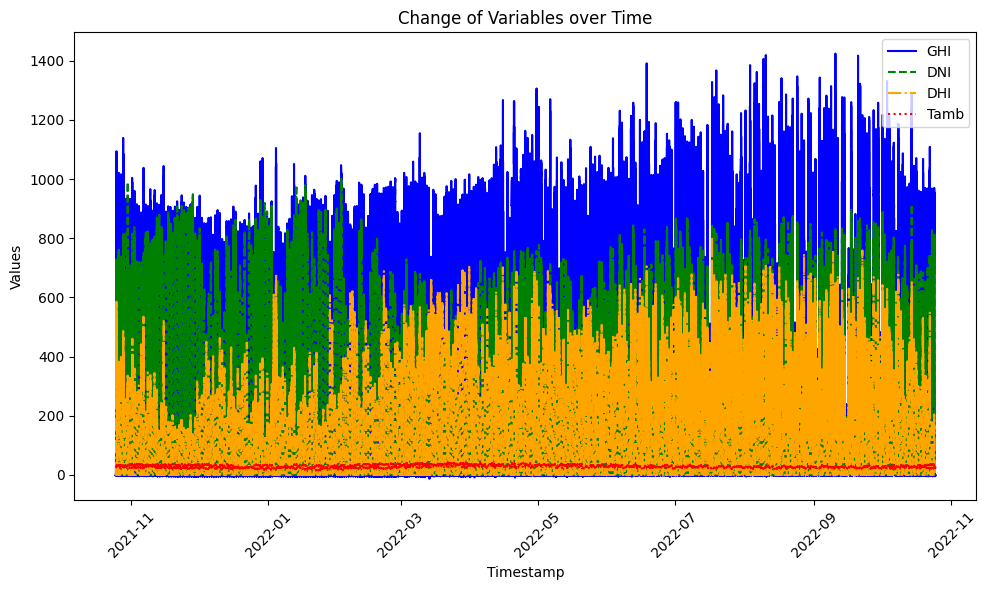

In [17]:
plot_time_series(togo_df)